# Project about terrorism

` First `
+  Download Dataset & load :- [ https://drive.google.com/drive/folders/1KxVUhXePXaQBzBz9kMHEMl3lCjt3C-4P?usp=drive_link]

`second`
+ import nessary libraries

` third `
+




# Introduction

This analysis delves into **global terrorism trends**, exploring how terrorist activities have evolved over time and identifying regions with significant deviations from global patterns. By examining attack success rates, prevalent tactics, and regional variations, we aim to uncover key insights into the nature of terrorist incidents worldwide. This exploration utilizes interactive plots and geographic visualizations to enhance understanding and engagement.

---

# About the Dataset

The dataset, sourced from the **Global Terrorism Database (GTD)**, provides comprehensive data on over **180,000 terrorist attacks** from 1970 to 2017. Managed by the National Consortium for the Study of Terrorism and Responses to Terrorism (START), this open-source repository offers detailed information on both domestic and international incidents, enabling a thorough examination of global terrorism trends.

---

![Global Terrorism Database](https://www.example.com/your-image-link.jpg)  <!-- Replace with an appropriate image link -->

**Key Features:**
- **Time Span:** 1970 - 2017
- **Number of Incidents:** 180,000+
- **Scope:** Domestic and International



In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import chardet
import missingno as msno
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature
import io
import base64
from IPython.display import HTML
# plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# extra_addition
pd.set_option('display.max_columns', 1000)  # Show 1000 columns
pd.set_option('display.max_rows', 1000)    # Show 1000 rows

In [3]:
path = os.path.join(os.getcwd(),"globalterrorismdb_0718dist.csv")
path

'F:\\from_C\\proj_jupyter\\globalterrorismdb_0718dist.csv'

### After download data on local machine check what is encoding using to encode data for this using ( chardet ) to define type data to avoid down UnicodeDecodeError.

In [4]:
# If you don't have chardet installed, uncomment the line below to install it:
# !pip install chardet

In [5]:
with open(path,"rb") as obj:
    res= chardet.detect(obj.read(10000))
print(res)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


# - Load and Explore the dataset

In [6]:
start_time = time.time()

df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1',low_memory=False)

pandas_duration = time.time() - start_time

pandas_duration

9.008770227432251

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.columns.to_list()

In [7]:
# rename some columns which needed it to exploring. 
df.rename(columns={'eventid':'id','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True )

# Cheat Sheet showing the missing value & some other features!!

In [ ]:

summary = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes,
    'Number of Nulls': df.isnull().sum(),
    'Percentage of Nulls': (df.isnull().sum() / len(df)) * 100,
    'Count of Non-Null Data': df.notnull().sum(),
    'number Unique Values': df.nunique()
})

summary['Percentage of Nulls'] = summary['Percentage of Nulls'].map('{:.4f}%'.format)

# # Ensure column names are unique
# summary.columns = [f'{col}_{i}' if summary.columns.tolist().count(col) > 1 else col
#                    for i, col in enumerate(summary.columns)]

# # Define a function to highlight rows where Number of Nulls > 0
# def highlight_nulls(row):
#     return ['background-color: yellow' if row['Number of Nulls'] > 0 else '' for _ in row]

# # Apply the styling to the DataFrame
# styled_summary = summary.style.apply(highlight_nulls, axis=1)

# # Display the styled DataFrame
# styled_summary

summary = summary.reset_index(drop=True)
summary.set_index('Column Name', inplace=True)

In [ ]:
summary.T

In [ ]:
# ((df.isna().sum()/len(df))*100).sort_values()

In [ ]:
# A plot shows just how much the data is missing values
plt.style.use('default')
missing_values = df.isna().sum()
miss_value = missing_values[missing_values > 0]

# rest_miss = len(df)- miss_value
# rest_miss [miss_value.index]

msno.bar(df[miss_value.index],fontsize=21,sort="ascending",color=sns.color_palette("Reds", len(miss_value)))
plt.title('Missing Values in Dataset ', fontsize=24, weight='bold')
plt.grid(axis='x', linestyle='--', linewidth=0.9, alpha=0.9)
plt.show()
# msno.bar(df,fontsize=21,color="b",sort="descending")


In [ ]:
df.info()

In [ ]:
df.dtypes.value_counts()

In [ ]:
df.iloc[:,1:].describe()

In [ ]:
missing_values = df.isna().sum()
miss_value_prec = (missing_values[missing_values > 0]/len(df))*100
miss_value = missing_values[missing_values > 0]
miss_value


In [ ]:
# features contain nulls 
indx_na = df.isna().sum()
indx_na[indx_na >0].index.to_list()

In [ ]:
## features not contain nulls 
indx_notna = df.notna().sum()
indx_notna[indx_notna == len(df)].index.to_list()

In [ ]:
df['resolution'] = pd.to_datetime(df['resolution'], format='%m/%d/%Y')

### - Numerical Features

In [ ]:
# only numeric columns.
numeric_cols = df.select_dtypes(include=[np.number])
numeric_cols

In [ ]:
# Calculate the mean, median, and standard deviation of relevant numeric columns.
numeric_cols = df.select_dtypes(include=[np.number])

numeric_summary = pd.DataFrame({
    'Mean': numeric_cols.mean(),
    'Median': numeric_cols.median(),
    'Standard Deviation': numeric_cols.std()
})

numeric_summary = numeric_summary.reset_index().rename(columns={'index': 'Column Name'})[1:].set_index('Column Name').T
numeric_summary

### - Categorical Features

In [ ]:
#  most frequent values in categorical columns.
catego_cols = df.select_dtypes(include=['object'])
catego_cols

In [ ]:
# Find the most frequent value (mode) for each categorical column
most_frequent = catego_cols.mode()
most_frequent.index =["most_freq_"]
most_frequent

In [ ]:
 df_terr.iloc[:,1:].corr(numeric_only=True) # correlation between numerical features

In [ ]:
#Heatmap to visualize the correlation between numerical features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot

correlation_matrix =  df_terr.iloc[:,1:].corr(numeric_only=True)
# correlation_matrix=num_cols.corr()
plt.style.use('default')

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.mpl_palette("viridis_r", as_cmap=True), fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Add labels and title
plt.title('Correlation Heatmap of Features', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Show the plot
plt.show()

---
> From a glance at the diagram, it becomes clear that the extent to which the numerical features are related to each other suggests a weak correlation.
---

# Time to analysis!
---
Given the extensive number of columns in the dataset, we'll focus on selecting only the key columns for data preprocessing to ensure a more efficient and manageable analysis. By concentrating on the most relevant columns, we can streamline our efforts and derive meaningful insights from the dataset.

---

In [8]:
#As we have many columns, we take the columns that are necessary for analysis.
df_terr = df[['id','Year','Month','Day','Country','Region','State','city','latitude','longitude','AttackType','Killed','Wounded',
            'Target','Summary','Group','Target_type','Weapon_type','Motive','success']]
df_terr.head()


,id,Year,Month,Day,Country,Region,State,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1


In [ ]:
df_terr.shape

In [ ]:
df_terr.info()

In [ ]:
# Calculate the mean, median, and standard deviation of relevant numeric columns -- on new dataset (df_terr).
num_cols = df_terr.select_dtypes(include=[np.number])

In [ ]:

num_summary = pd.DataFrame({
    'Mean': numeric_cols.mean(),
    'Median': numeric_cols.median(),
    'Standard Deviation': numeric_cols.std()
})

numeric_view = num_summary.reset_index().rename(columns={'index': 'Column Name'})[1:].set_index('Column Name').T
numeric_view

In [ ]:

# Find the most frequent value (mode) for each categorical column
most_freq = catego_cols.mode()
most_freq.index =["most_freq_"]
most_freq

In [ ]:
# number terrsiom attacks per year
attacks_per_year = df_terr.groupby('Year').size().reset_index(name='number of attacks per year')
attacks_per_year.T

In [ ]:

# attacks_per_year.loc[attacks_per_year['number of attacks per year'].idxmax(), 'Year']

In [ ]:
# sns.lineplot(x='Year', y='number of attacks per year', data=attacks_per_year, color='b',marker="o")

plt.style.use('ggplot')
plt.figure(figsize=(12, 8))

# Create the line plot
sns.lineplot(
    x='Year',y='number of attacks per year',data=attacks_per_year,color='b',marker='o',
#     linestyle=':',  # Line style
    linewidth=2, markersize=8,
    markerfacecolor='red',  # Marker fill color
    markeredgecolor='black'  # Marker edge color
)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add labels and title
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Attacks', fontsize=14, fontweight='bold')
plt.title("Terrorism Attacks Trends from 1970 to 2017", fontsize=16, fontweight='bold')

# Add annotations or highlights (optional)
plt.annotate('Peak', xy=(attacks_per_year.loc[attacks_per_year['number of attacks per year'].idxmax(), 'Year'],attacks_per_year['number of attacks per year'].max()),
             xytext=(2012, attacks_per_year['number of attacks per year'].max()+1500),
             arrowprops=dict(facecolor='black'))

# Display the plot
plt.show()

## > We conclude from here that most terrorist attacks are concentrated in` 2014`. 
+ Here are the five largest attacks over the years.

In [ ]:
attacks_per_year.nlargest(5,'number of attacks per year')

### Plot showing Terrorist Activities Each Year

In [ ]:
# Number Of Terrorist Activities Each Year
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(15,6))
sns.countplot(x='Year',data=df_terr,palette='rocket',edgecolor=sns.color_palette('magma',5))


plt.xlabel('Attack Year', fontsize=14)
plt.ylabel('Number of Attacks each year', fontsize=14)
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)

plt.title('Number Of Terrorist Activities Each Year',fontsize=15, fontweight='bold')
# plt.tight_layout()

plt.show()

---
# Total active terrorist attacks on region.

In [ ]:
# numbers terrrosim attacks on region
attacks_per_region = df_terr.groupby('Region').size().reset_index(name='Total_attacks_region')
attacks_per_region.sort_values(by='Total_attacks_region',ascending=False)

In [ ]:
plt.style.use('ggplot')
plt.subplots(figsize=(15, 6))
sns.barplot(x='Region',y='Total_attacks_region' ,
            data=attacks_per_region,palette='hot',
            order=df_terr['Region'].value_counts().index,edgecolor=sns.color_palette('rocket',5))

# Customize y-axis
plt.yticks(fontsize=12)

# Add labels and title
plt.xlabel('Region', fontsize=14,fontweight='bold')
plt.ylabel('Total Attacks', fontsize=14,fontweight='bold')
plt.title('Number Of Terrorist Activities by Region', fontsize=15, fontweight='bold')

plt.xticks(rotation=45,fontsize=12,ha='right')
plt.yticks(fontsize=12)


# Adjust layout to prevent overlapping
# plt.tight_layout()

# Show the plot
plt.show()

---
+ `Middle East and North Africa` are the most terrorism prone regions followed by `South Asia`. `The Australian` Region have experienced very few terrorist events.
Collectively we can say that The African and Asian Continent experience the highest terrorist attacks.
---

## Sheet showing the number of terrorism attacks per `region` each `year`.

In [ ]:
# sheet showing number terrosim attacks on region per year . 

attc_region_per_year=pd.crosstab(df_terr.Year,df_terr.Region)

attc_region_per_year['[sum_attacks on region per year]'] = attc_region_per_year.sum(axis=1)
attc_region_per_year.loc['[Total_attac_region]']= attc_region_per_year.sum()
attc_region_per_year.T

---
Total terrorist strikes per `country`
---

In [ ]:
# total terssiom attacks on country each year.
attacks_country = df_terr.Country.value_counts().to_frame().reset_index()
attacks_country.columns=['Country','total_attacks per country']
attacks_country.T

In [ ]:
# df_terr.groupby('Country').size()
# attacks_country = df_terr.groupby('Country').size().reset_index()
# attacks_country

In [ ]:
# plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

plt.figure(figsize=(15, 6))

# Assuming `df_terr` is your DataFrame with a 'Country' column
top_countries = df_terr['Country'].value_counts().nlargest(15)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='YlOrRd_r',orient="h",edgecolor=sns.color_palette('gist_heat',4))

plt.title('Top 15 Countries Affected by Terrorist Activities', fontsize=15, fontweight='bold')
plt.ylabel('Countries', fontsize=17,fontweight='semibold')
plt.xlabel('Count', fontsize=14,fontweight='semibold')

plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)

plt.tight_layout()
plt.show()


---
From the graph we can see The Most `5 Targered` Affected Country with Terrorism Attacks are:
1. Iraq
2. Pakistan	
3. Afghanistan	
4. India
5. Colombia	
* `iraq` has witnessed a very large number of terrorist activities followed by Pakistan,Afghanistan..etc .
One thing to note is the countries with highest attacks, are mostly densely populated countries, thus it will eventually claim  many lives.
---

## sheet showing the number of terrorism attacks per `country` each `year`.

In [ ]:
attac_country_per_year = pd.crosstab(df_terr.Country,df_terr.Year)
attac_country_per_year["[sum_per_year]"] = attac_country_per_year.sum(axis=1)
attac_country_per_year.loc["[sum_attacks on country per year]"] =attac_country_per_year.sum()
attac_country_per_year.T

---
Total Cacasualties & Killed & Wounded each Country under Region
---

In [ ]:
# sheet view total cacasualties & killed & wounded each country under region
results_terr =df_terr[['Region','Country','Killed','Wounded','casualties']]
results_terr = results_terr.groupby(['Region','Country']).sum().sort_values(by='casualties',ascending=False).reset_index()
results_terr.T

In [ ]:
# killed per year
k = df_terr[["Year", "Killed"]].groupby("Year").sum()
# wounded per year
w = df_terr[["Year", "Wounded"]].groupby("Year").sum()
print(w.head())
print(k.head())

In [ ]:
merged_k_w = pd.merge(w, k, on="Year")
merged_k_w.reset_index(inplace=True)
merged_k_w.head(10)

In [ ]:
# Apply style
plt.style.use('ggplot')

# Create a figure and two subplots
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(15, 10))

# Plot 'Killed' data
k.plot(kind="bar", color='#1f77b4', ax=ax0, legend=True)
ax0.set_title("People Killed in Each Year", fontsize=16)
ax0.set_xlabel("Years", fontsize=12)
ax0.set_ylabel("Number of People Killed", fontsize=12)

ax0.set_xticklabels(k.index, rotation=45, fontsize=10)
ax0.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax0.tick_params(axis='both', which='major', labelsize=10)
ax0.legend(["Killed"], loc='upper left', bbox_to_anchor=(0, 1))

# Add data labels
for i in ax0.containers:
    ax0.bar_label(i, label_type='edge', fontsize=7)

# Plot 'Wounded' data
w.plot(kind="bar", color='#ff7f0e', ax=ax1, legend=True)
ax1.set_title("People Wounded in Each Year", fontsize=16)
ax1.set_xlabel("Years", fontsize=12)
ax1.set_ylabel("Number of People Wounded", fontsize=12)

ax1.set_xticklabels(w.index, rotation=45, fontsize=10)
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.legend(["Wounded"], loc='upper left', bbox_to_anchor=(0, 1))

# Add data labels
for i in ax1.containers:
    ax1.bar_label(i, label_type='edge', fontsize=7)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

---
+ Looking at these annual charts & sheet , we can say that the largest year was killing in `2014`, and then it began a gradual decline to `2017`

In [ ]:
# largest 10 years people killed 
merged_k_w.nlargest(10,['Killed']).drop('Wounded',axis=1)

---
+ Regarding the wounded we can say that the largest year was killing in `2015`and then it began a gradual decline to `2017`

In [ ]:
# largest 10 years people Wounded 
merged_k_w.nlargest(10,['Wounded']).drop('Killed',axis=1)

---

+ success - Success of a terrorist strike
> * 0 : Represents failure to perform the operation.
> * 1: Represents success to perform the operation.

In [ ]:
# sheet demonstrate number of terrorist attscks each countery & extent of the success and failure of these strikes and thier impact on people
# Aggregate the data
coun_stats = df_terr.groupby(['Region','Country', 'success']).agg({
    'Killed': 'sum',
    'Wounded': 'sum',
    'Country': 'count'  # Counts the number of occurrences for each (Country, success) pair
}).rename(columns={'Country': 'Num_Attacks'}).reset_index()

# Melt the DataFrame to combine 'Killed' and 'Wounded' into a single 'Types' column
coun_stats_melted = pd.melt(coun_stats, id_vars=['Region','Country', 'Num_Attacks', 'success'], value_vars=['Killed', 'Wounded'], var_name='Types', value_name='Counts_Types')

# Display the melted DataFrame
coun_stats_melted.sort_values(by=['Region', 'Country', 'Types']).reset_index(drop=True).sort_values(by='Counts_Types',ascending=False).reset_index(drop=True)


In [ ]:
# Group by Country and Year and sum the number of killings
country_killings = df_terr.groupby(['Country','success'])[['Killed','Wounded']].sum().reset_index()

# Sort the data by the number of killings in descending order
# top_countries=country_killings.nlargest(10,'Killed')
# top_countries
country_killings

In [ ]:
# Group by Country and Year and sum the number of killings
country_killings = df_terr.groupby(['Country','success'])['Killed'].sum().reset_index()

# Sort the data by the number of killings in descending order
# top_countries=country_killings.nlargest(10,'Killed')
# top_countries
country_killings

In [ ]:
plt.style.use('default')
# Get the top 15 Region by number of attacks
reg_terror = df_terr['Region'].value_counts().to_frame()
reg_terror.columns = ['Attacks']

# Sum the number of people killed per Region
reg_kill = df_terr.groupby('Region')['Killed'].sum().to_frame()

# Sum the number of people wounded per Region
reg_wound = df_terr.groupby('Region')['Wounded'].sum().to_frame()

# Merge the information
reg_stats = reg_terror.merge(reg_kill, left_index=True, right_index=True, how='left')
reg_stats = reg_stats.merge(reg_wound, left_index=True, right_index=True, how='left')

# Use seaborn color palette
palette = sns.color_palette("rocket", 3)  # Choose a palette with 3 colors

# Plot the data
fig, ax = plt.subplots(figsize=(18, 6))

reg_stats.plot(kind='bar', width=0.9, ax=ax, color=palette)

ax.set_title('Top Region Number of Attacks, People Killed, and Wounded',fontsize=18)
ax.set_xlabel('Region')
ax.set_ylabel('Count')
# ax.legend( labels=['Total Attacks', 'No.Killed', 'No.Wounded'])
ax.legend(labels=['Total Attacks', 'No. Killed', 'No. Wounded'], loc='upper center', bbox_to_anchor=(0.5, .99), ncol=3, fontsize=12)


plt.xticks(rotation=45,ha='right',fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
# plt.tight_layout()
plt.show()



---
+ The `Middle East and North Africa` region is considered the region most vulnerable to terrorism, followed by `South Asia`, which has a large population density, which will lead to large numbers of deaths and injuries. Although the `Australian region` has witnessed only a very small number of terrorist incidents, there have been deaths and injuries there... We can say, in one way or another, that the continents of `Africa and Asia` are witnessing the highest terrorist attacks.

In [ ]:
# Get the top 15 countries by number of attacks
coun_terror = df_terr['Country'].value_counts()[:20].to_frame()
coun_terror.columns = ['Attacks']

# Sum the number of people killed per country
coun_kill = df_terr.groupby('Country')['Killed'].sum().to_frame()

# Sum the number of people wounded per country
coun_wound = df_terr.groupby('Country')['Wounded'].sum().to_frame()

# Merge the information
coun_stats = coun_terror.merge(coun_kill, left_index=True, right_index=True, how='left')
coun_stats = coun_stats.merge(coun_wound, left_index=True, right_index=True, how='left')

# Use seaborn color palette
palette = sns.color_palette("rocket", 4)  # Choose a palette with 3 colors

# Plot the data
fig, ax = plt.subplots(figsize=(18, 6))

coun_stats.plot(kind='bar', width=0.9, ax=ax, color=palette)

ax.set_title('Top 20 Countries by Number of Attacks, People Killed, and Wounded',fontsize=18)
ax.set_xlabel('Country')
ax.set_ylabel('Count')
# ax.legend( labels=['Total Attacks', 'No.Killed', 'No.Wounded'])
ax.legend(labels=['Total Attacks', 'No. Killed', 'No. Wounded'], loc='upper center', bbox_to_anchor=(0.5, .99), ncol=3, fontsize=12)


plt.xticks(rotation=45,ha='right',fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
# plt.tight_layout()
plt.show()



In [ ]:
# its' okay
import plotly.express as px

# Group by Country and Year and sum the number of killings
country_killings = df_terr.groupby(['Country'])['Killed'].sum().reset_index()

# Sort the data by the number of killings in descending order
top_countries=country_killings.nlargest(150,'Killed')
top_countries

# Create a treemap with Plotly
fig = px.treemap(
    top_countries,
    path=['Country'],
    values='Killed',
    color='Killed',
    color_continuous_scale='Reds',
    title='Killings in Global Terrorism (Top 150 Countries)',
    labels={'Killed': 'Number of Killings'}
)

# Customize layout for better readability
fig.update_layout(
    title={
        'text': 'Killings in Global Terrorism (Top 150 Countries)',
        'font_size': 24,
        'font_family': 'Arial black',
        'x': 0.5,
        # 'y': 1,
        'xanchor': 'center'
    },
    margin=dict(t=60, l=10, r=10, b=20),
    coloraxis_colorbar=dict(
    #     title='Number of Killings',
        # tickvals=[0, top_countries['Killed'].max()],
        # ticktext=['Low', 'High'],
        # tickfont=dict(size=14, color='black', family='Arial',),
        title_font=dict(size=12, color='darkred'),
        lenmode='pixels',
    #     # len=3000
    ),
    # uniformtext=dict(minsize=12, mode='hide'),  # Adjust text size and hiding mode
    showlegend=True  # Hide legend if not needed
)

# # Customize text for better readability
fig.update_traces(
    texttemplate='%{label}<br>%{value:,}',  # Format text for better readability
    textfont=dict(size=17, color='black', family='Arial black'),  # Customize text font and color
    marker_line=dict(color='darkcyan', width=1),  # Add borders around the blocks
    hovertemplate='<b>%{label}</b><br>Number of Killings: %{value:,}<extra></extra>',  # Improve hover text
    textposition='middle center', # Place text in the middle of the blocks

)

# # Add annotations to highlight specific data points (optional)
# annotations = [
#     dict(
#         x=1, y=1,
#         text='',
#         showarrow=False,
#         font=dict(size=20, color='white')
#     )
# ]
# fig.update_layout(annotations=annotations)

# Show plot
fig.show()


---

In [ ]:
import plotly.express as px
# Group by Country and Year and sum the number of killings
country_year_killings = df_terr.groupby(['Country', 'Year'])['Killed'].sum().reset_index()

# Sort the data by the number of killings in descending order
top_countries_year=country_year_killings.nlargest(50,'Killed')
top_countries_year
# Create a treemap with Plotly
fig = px.treemap(
    top_countries_year,
    path=['Country', 'Year'],
    values='Killed',
    color='Killed',
    color_continuous_scale='Reds',
    title='Killings in Global Terrorism on Years (Top 50 Years under Countries)',
    labels={'Killed': 'Number of Killings'}
)

# Customize layout for better readability
fig.update_layout(
    title={
        # 'text': title,
        'font_size': 24,
        'font_family': 'Arial Black',
        'x': 0.5,
        'xanchor': 'center'
    },
    margin=dict(t=60, l=10, r=10, b=20),
    coloraxis_colorbar=dict(
    #     title='Number of Killings',
        tickvals=[0, top_countries_year['Killed'].max()],
        ticktext=['Low', 'High'],
    #     tickfont=dict(size=14, color='black', family='Arial'),
    #     title_font=dict(size=12, color='darkred'),
    #     lenmode='pixels',
    ),
    showlegend=True
)

# Customize text for better readability
fig.update_traces(
    texttemplate='Year:%{label}<br>Number of Killings: <br>%{value:,}',  # Format text for better readability
    textfont=dict(size=17, color='black', family='Arial Black'),  # Customize text font and color
    marker_line=dict(color='darkcyan', width=1),  # Add borders around the blocks
    hovertemplate='Year:%{label}</b><br>Number of Killings: %{value:,}<extra></extra>',  # Improve hover text
    textposition='middle center',  # Place text in the middle of the blocks
)

# Add annotations to highlight specific data points (optional)
annotations = [
    dict(
        x=0.5, y=1.05,
        text=' ',
        showarrow=False,
        font=dict(size=14, color='grey'),
        xref='paper',
        yref='paper'
    )
]
fig.update_layout(annotations=annotations)

# Show plot
fig.show()


---

## The type of attack and its impact on the number of casualties killed and wounded.

In [ ]:
# type of attack has an effect on the number of people killed and wounded. 
killed_wounded_attack_type = df_terr.groupby('AttackType').agg({'AttackType':'count','Killed': 'sum', 'Wounded': 'sum',}).rename(columns={'AttackType':'Num_Attacks'}).reset_index()
killed_wounded_attack_type.set_index('AttackType',inplace=True)
killed_wounded_attack_type = killed_wounded_attack_type.reset_index().sort_values(by='Num_Attacks',ascending=False)
killed_wounded_attack_type


---

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 6))

# Create a count plot with Seaborn
sns.countplot(
    x='AttackType',
    data=df_terr,
    palette='Reds_r',
    order=df_terr['AttackType'].value_counts().index
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=55,ha='right')

# Add a title to the plot
plt.title('The Most Attacking Methods by Terrorists', fontsize=16)

# Show the plot
# plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()

In [ ]:
# to get on overall casualties killing and wounding.
df_terr['casualties'] = df_terr['Killed'].fillna(0) + df_terr['Wounded'].fillna(0)

In [ ]:
# df_terr['casualties'] = df_terr['Killed'].fillna(0) + df_terr['Wounded'].fillna(0)

# Set the style of the visualization
plt.style.use('ggplot')

# Create the scatter plot
plt.figure(figsize=(14, 8))
scatter_plot = sns.scatterplot(data=df_terr, x='AttackType', y='casualties', hue='AttackType', palette='Set2', s=150, alpha=0.8, edgecolor="w")

# Customize the plot
scatter_plot.set_title('Relationship Between Number of Casualties and Type of Attack', fontsize=16, fontweight='bold')
scatter_plot.set_xlabel('Type of Attack', fontsize=14)
scatter_plot.set_ylabel('Number of Casualties', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=13)

scatter_plot.legend(title='Attack Type', loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fancybox=True, shadow=True)

# Adjust x-axis labels for better readability
# scatter_plot.set_xticklabels(scatter_plot.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)

# Show the plot
# plt.tight_layout()
plt.show()

---

In [ ]:
# Use seaborn color palette
palette = sns.color_palette("gist_heat",3 )  # Choose a palette with 3 colors

# Plot the data
fig, ax = plt.subplots(figsize=(18, 6))
killed_wounded_attack_type.plot(kind='bar', width=0.9, ax=ax, color=palette)

ax.set_title('Number of Attacks, People Killed, and Wounded by Attack Type', fontsize=16)
ax.set_xlabel('Attack Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Set x-axis ticks and labels
ax.set_xticklabels(killed_wounded_attack_type.index, rotation=45, ha='right')

# Add legend
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.85, .97), fontsize=11, ncol=3, frameon=True)
frame = legend.get_frame()
frame.set_facecolor('lightgrey')  # Set the background color of the legend box
frame.set_edgecolor('black')

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# plt.tight_layout()
plt.show()

---
## Now let us check out which Terrorist organizations have carried out their operations in each country.

---

In [16]:
((df_terr.value_counts('Group')/len(df_terr))*100).reset_index()

,Group,count
0,Unknown,45.561971
1,Taliban,4.115779
2,Islamic State of Iraq and the Levant (ISIL),3.089311
3,Shining Path (SL),2.507004
4,Farabundo Marti National Liberation Front (FMLN),1.844340
...,...,...
3532,Jaish al-Muhajireen wal-Ansar (Muhajireen Army),0.000550
3533,Jaish al-Islam (Libya),0.000550
3534,Jaish Tahkim al-Din,0.000550
3535,Jaish Al-Umma (Army of the Nation),0.000550


---
By looking at the data and performing some mathematical procedures, we find that unknown data represents `45%` of the total data that we have, and we will work to solve it. 

---

In [19]:
df_terr.loc[df_terr['Group'] == 'Unknown', 'Group'] = 'Israel Security Intelligence Service (ISIS)'

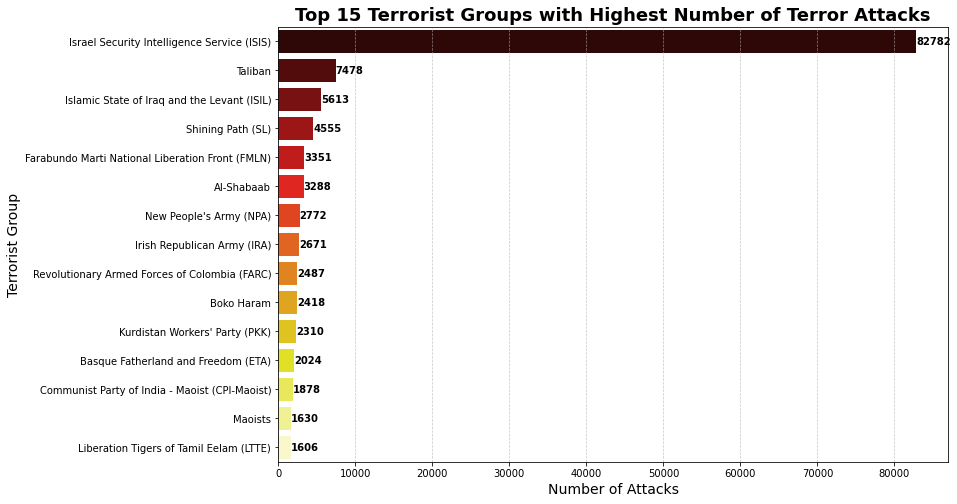

In [20]:
palette = sns.color_palette("hot",15)

# Create the plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=df_terr['Group'].value_counts()[:15].values, y=df_terr['Group'].value_counts()[:15].index, data=df_terr[:15], palette=palette)

# Enhance the plot with annotations
for p in bar_plot.patches:
    width = p.get_width()
    bar_plot.text(width + 0.5, p.get_y() + p.get_height() / 2, f'{int(width)}',
                  va='center', ha='left', fontsize=10, color='black', weight='bold')

# Set plot title and labels
plt.title('Top 15 Terrorist Groups with Highest Number of Terror Attacks', fontsize=18, weight='bold',)
plt.xlabel('Number of Attacks', fontsize=14)
plt.ylabel('Terrorist Group', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout for better visualization
# plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# pip install geopandas

In [ ]:
# its okay
import geopandas as gpd
from shapely.geometry import Point

# Ensure your df_terr DataFrame has 'longitude' and 'latitude' columns
df_terr['Coordinates'] = df_terr.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Create a GeoDataFrame
gdf_terr = gpd.GeoDataFrame(df_terr, geometry='Coordinates')

# Filter top 15 groups by number of attacks
top_groups = df_terr[df_terr['Group'].isin(df_terr['Group'].value_counts()[:15].index)]

# Create a GeoDataFrame for top groups
gdf_top_groups = gpd.GeoDataFrame(top_groups, geometry='Coordinates')

# Load the world map shapefile (replace 'path_to_shapefile' with your actual path)
world = gpd.read_file("ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shp")

# Plot the map
fig, ax = plt.subplots(figsize=(22, 10))
ax.patch.set_facecolor('lightblue')

world.plot(ax=ax, color='burlywood', edgecolor='black')

# Define colors and groups
colors = ['r', 'g', 'b', 'y', '#800000', '#ff1100', '#8202fa', '#20fad9', '#ff5733', '#fa02c6', "#f99504", '#b3b6b7', '#8e44ad', '#1a2b3c']
groups = list(gdf_top_groups['Group'].unique())

# Plot points for each group
for group, color in zip(groups, colors):
    group_data = gdf_top_groups[gdf_top_groups['Group'] == group]
    group_data.plot(ax=ax, marker='o', color=color, markersize=5, label=group, alpha=0.6)

# Add legend
legend = plt.legend(loc='lower left', frameon=True, prop={'size': 10})
frame = legend.get_frame()
frame.set_facecolor('white')

# Set plot title
plt.title('Regional Activities of Terrorist Groups')

# Show the plot
plt.show()


In [27]:
df_terr.Target_type.head(10)

0    Private Citizens & Property
1        Government (Diplomatic)
2            Journalists & Media
3        Government (Diplomatic)
4        Government (Diplomatic)
5                         Police
6                         Police
7                      Utilities
8                       Military
9           Government (General)
Name: Target_type, dtype: object

In [26]:
(df_terr.Target_type.value_counts()/len(df_terr))*100

Target_type
Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Government (Diplomatic)            1.966526
Terrorists/Non-State Militia       1.672620
Journalists & Media                1.622535
Violent Political Party            1.027018
Airports & Aircraft                0.739167
Telecommunication                  0.555338
NGO                                0.533873
Tourists                           0.242169
Maritime                           0.193185
Food or Water Supply               0.174472
Abortion Related                   0.144751
Other                              0.075403
Name: count, dtype: 

In [28]:
# Filter out rows where 'Target_type' is 'Unknown'
Target_type_filter = df_terr[df_terr['Target_type'] != 'Unknown']
Target_type_filter.head(10)

,id,Year,Month,Day,Country,Region,State,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success,Coordinates
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1,POINT (-69.951164 18.456792)
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1,POINT (-99.086624 19.371887)
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Israel Security Intelligence Service (ISIS),Journalists & Media,Unknown,NaN,1,POINT (120.599741 15.478598)
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Israel Security Intelligence Service (ISIS),Government (Diplomatic),Explosives,NaN,1,POINT (23.762728 37.99749)
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Israel Security Intelligence Service (ISIS),Government (Diplomatic),Incendiary,NaN,1,POINT (130.396361 33.580412)
5,197001010002,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,1,POINT (-89.176269 37.005105)
6,197001020001,1970,1,2,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN,0,POINT (-56.187214 -34.891151)
7,197001020002,1970,1,2,United States,North America,California,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Israel Security Intelligence Service (ISIS),Utilities,Explosives,NaN,1,POINT (-122.225906 37.791927)
8,197001020003,1970,1,2,United States,North America,Wisconsin,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,1,POINT (-89.412488 43.076592)
9,197001030001,1970,1,3,United States,North America,Wisconsin,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,1,POINT (-89.386694 43.07295)


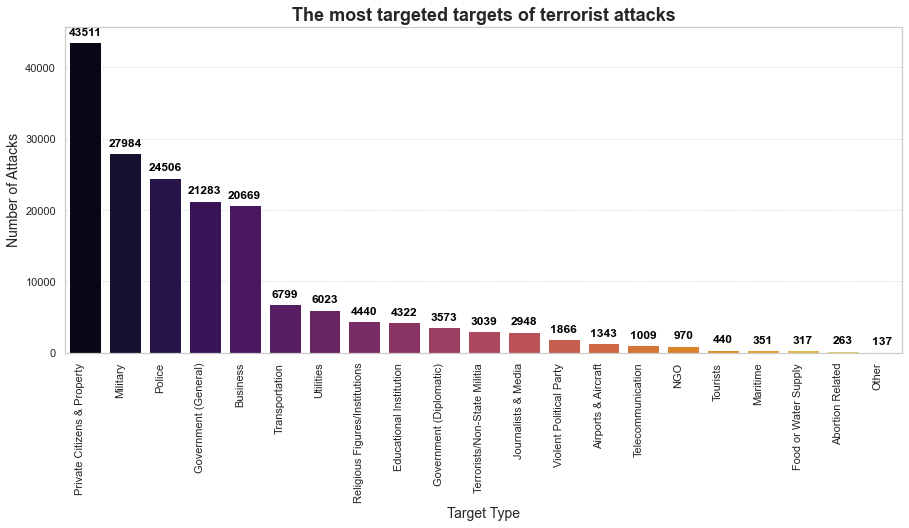

In [29]:

# Set the size and style of the plot
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")  # Set the style to 'whitegrid' for a cleaner background

# Create the countplot
ax = sns.countplot(
    x='Target_type',
    data=Target_type_filter,
    palette='inferno',
    order=Target_type_filter['Target_type'].value_counts().index
)

# Add annotations on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12,
                weight='bold',
                color='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Set plot title and labels
plt.title('The most targeted targets of terrorist attacks', fontsize=18, weight='bold')
plt.xlabel('Target Type', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)

# Add gridlines for y-axis
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout for better spacing
# plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# !conda install -c conda-forge imagemagick

In [ ]:
# !pip install cartopy
# !apt-get install imagemagick

In [ ]:
# Pillow 
# imagemagick

---
Animation shows the spread of terrorist activities in the country over the past years.
---

In [ ]:

import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import base64
import io
from IPython.display import HTML

# Sample data creation (replace with your actual DataFrame)
# Assuming df_terr has columns 'Year', 'latitude', 'longitude', 'Killed', 'Wounded'
data = df_terr.copy()  # Create a copy to avoid modifying the original DataFrame
data['casualties'] = data['Killed'] + data['Wounded']  # Combine casualties

# Create a figure with Cartopy projection
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add land and ocean with specified colors
ax.add_feature(cfeature.LAND, facecolor='burlywood')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Initialize scatter object to None outside the function
scatter = None

def animate(year):
    global scatter  # Use global scatter object

    # Clear the axis to redraw
    ax.clear()

    # Add land and ocean with specified colors again after clearing
#     ax.add_feature(cfeature.LAND, facecolor='burlywood')
#     ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.BORDERS, linestyle='--')
    ax.coastlines()

    # Filter data for the current year
    year_data = data[data['Year'] == year]

    # Create or update scatter plot data
    scatter = ax.scatter(
        year_data['longitude'],
        year_data['latitude'],
        s=year_data['casualties'] * 0.1,  # Adjust marker size based on casualties
        color='red',
        alpha=0.7,
        transform=ccrs.PlateCarree()  # Use PlateCarree projection
    )

    # Update title
    ax.set_title(f'Animation of Attack Terrorist Activities on The Country\nYear: {year}', fontsize=12)
    ax.set_global()

    return scatter

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=sorted(data['Year'].unique()), interval=1500)

# Save the animation as a gif
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close()

# Display the gif in a Jupyter notebook
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data=f'<img src="data:image/gif;base64,{encoded.decode("ascii")}" type="gif" />')


In [ ]:
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import base64
import io
from IPython.display import HTML

# Sample data creation (replace with your actual DataFrame)
# Assuming df_terr has columns 'Year', 'latitude', 'longitude', 'Killed', 'Wounded'
data = df_terr.copy()  # Create a copy to avoid modifying the original DataFrame
data['casualties'] = data['Killed'] + data['Wounded']  # Combine casualties

# Create a figure with Cartopy projection
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add land and ocean with specified colors
ax.add_feature(cfeature.LAND, facecolor='burlywood')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Initialize scatter object to None outside the function
scatter = None

def animate(year):
    global scatter  # Use global scatter object

    # Clear the axis to redraw
    ax.clear()

    # Add land and ocean with specified colors again after clearing
    ax.add_feature(cfeature.LAND, facecolor='burlywood')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.BORDERS, linestyle='--')
    ax.coastlines()

    # Filter data for the current year
    year_data = data[data['Year'] == year]

    # Create or update scatter plot data
    scatter = ax.scatter(
        year_data['longitude'],
        year_data['latitude'],
        s=year_data['casualties'] * 0.1,  # Adjust marker size based on casualties
        color='red',
        alpha=0.7,
        transform=ccrs.PlateCarree()  # Use PlateCarree projection
    )

    # Update title
    ax.set_title(f'Animation of Terrorist Activities \nYear: {year}', fontsize=12)
    ax.set_global()

    return scatter

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=sorted(data['Year'].unique()), interval=1500)

# Save the animation as a gif
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close()

# Display the gif in a Jupyter notebook
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data=f'<img src="data:image/gif;base64,{encoded.decode("ascii")}" type="gif" />')


# Distribution showing the total terrorist attacks by country during the past years and the most affected countries.

In [ ]:
import plotly.express as px

# Group the data by country and count the number of attacks
country_counts = df_terr['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']

# Create the choropleth map
fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='Attack Count',
    title='Distrbution Terrorist Attacks by Country',
    labels={'Attack Count': 'Number of Attacks'},
    hover_name='Country',
    color_continuous_scale='YlOrRd'
)

# Customize the color scale
fig.update_layout(
    title=dict(
        text='Distrbution Terrorist Attacks by Country Over The Past Years',
        font=dict(size=24, family='Arial', color='black'),
        x=0.5,
        xanchor='center'
    ),
    geo=dict(
      showframe=False,
        showcoastlines=True,
        projection_type='equirectangular',
        # center=dict(lat=0, lon=0),  # Center the map on a specific latitude and longitude
        # projection_scale=5,
    ),
    coloraxis_colorbar=dict(
        title='Number of Attacks',
        ticks='outside',
        ticklen=5,
        tickcolor='black',
        showticksuffix='all'
    ),
      # paper_bgcolor='lightgrey'  # Change the background color of the entire figure
    # plot_bgcolor='black'   # Change the background color of the plot area
     width=1000,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Add a hover template
fig.update_traces(
    hovertemplate='<b>%{hovertext}</b><br>Number of Attacks: %{z}<extra></extra>'
)

fig.show()


In [32]:
# ------------------------------------------------------------------------------------------------------------------------------

# ]-------------------->:Performance Comparison with Dask:<--------------------------[

+ Demonstrate how to use Dask to perform similar operations with large datasets.
+  Compare the performance and memory usage of Dask operations with Pandas.

# -----------------------------------------------------------------------------------------------------

# some extra_analysis & insight.

In [ ]:
# pd.crosstab(df_terr.Country,df_terr.Year,values=df_terr.casualties,aggfunc='sum')   xxxxxxxxxxxxxxxxxxx

In [ ]:
# df_terr[df_terr['Country'] == 'Afghanistan'].shape      xxxxxxxxxxxxxxxxxxxxxxx

In [ ]:
# Assuming your DataFrame (df_terr) has a 'Region' column
# df_terr['casualties'] = df_terr['Killed'] + df_terr['Wounded']  # Ensure you have the 'casualties' column

# Create a pivot table with 'Region' and 'Country' as a multi-level index
casual_country_year_region = df_terr.pivot_table(index=['Region', 'Country'], columns='Year', values='casualties', aggfunc='sum')

# Fill missing values with 0
casual_country_year_region.fillna(0, inplace=True)

# Calculate the total casualties for each country
casual_country_year_region['[Total_casualties_each_country_under_region]'] = casual_country_year_region.sum(axis=1)

# Sort the pivot table based on the total casualties
# casual_country_year_region = casual_country_year_region.sort_values(by=['[Total_casualties_each_country_under_region]'], ascending=False)

# Display the first few rows of the pivot table
# casual_country_year_region
casual_country_year_region


In [ ]:
# Sum the killed and wounded per country and success status    xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
# coun_stats = df_terr.groupby(['Country', 'success']).sum().reset_index()

# coun_stats_melted = pd.melt(coun_stats, id_vars=['Country', 'success'], value_vars=['Killed', 'Wounded'], var_name='Metric', value_name='Count')

# coun_stats_melted.value_counts().reset_index().sort_values(by='Country',ascending=True)

In [ ]:
# # Get the top 15 countries with the most attacks           xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

# # Sum the killed and wounded per country and success status
# coun_stats = df_terr.groupby(['Country', 'success']).sum().reset_index()

# # Count the number of attacks per country and success status
# coun_counts = df_terr.groupby(['Country', 'success']).size().reset_index(name='Num_Attacks')

# # Merge the counts with the stats DataFrame
# coun_stats = pd.merge(coun_stats, coun_counts, on=['Country', 'success'])

# # Melt the DataFrame for combined plot
# coun_stats_melted = pd.melt(coun_stats, id_vars=['Country', 'Num_Attacks','success'], value_vars=['Killed', 'Wounded'], var_name='Types', value_name='Count')

# coun_stats_melted.value_counts().reset_index().sort_values(by='Country',ascending=True)

In [ ]:
coun_stats_melted = pd.melt(coun_stats, id_vars=['Country', 'Num_Attacks','success'], value_vars=['Killed', 'Wounded'], var_name='Types', value_name='Count')

coun_stats_melted.value_counts().reset_index().sort_values(by='Count',ascending=Falsese)

In [ ]:
reg_terror = df_terr['Region'].value_counts()

reg_terror

In [ ]:
# from IPython.display import display

# # Display the pivot table in a Jupyter notebook
# display(casual_country_year_region)


In [ ]:
# sheet numbers casualties attacts terrsion in country per year     xxxxxxxxxxxxxxxxxxxxxxxxxxxx
# casual_country_year = df_terr.pivot_table(index='Country',columns='Year',values='casualties')
# casual_country_year.fillna(0,inplace=True)
# casual_country_year.head()

In [ ]:
# pip install squarify

In [ ]:
df_terr.columns

In [ ]:
# Group by Country and Year and sum the number of killings
country_killings = df_terr.groupby(['Country','success'])['Killed'].sum().reset_index()

# Sort the data by the number of killings in descending order
# top_countries=country_killings.nlargest(10,'Killed')
# top_countries
country_killings

In [ ]:
country_year_killings = df_terr.groupby(['Country', 'Year'])['Killed'].sum().reset_index()
top_countries_year=country_year_killings.nlargest(10,'Killed')
top_countries_year

# cheat sheet viwe number of casualties kill & wound each region


In [ ]:
coun_stats_melted

In [ ]:
# cheat sheet viwe number of casualties kill & wound each region
sheet_Region = coun_stats_melted.drop(columns=['Country','success']).rename(columns={'Counts_Types': 'NO.casualties_ related_types'})
killed_wounded_region_sh= sheet_Region.groupby(['Region','Types']).sum().reset_index()
killed_wounded_region_sh

In [ ]:
# graph region on here ok

# **Now let us check out which Terrorist organizations have carried out their operations in each country.**

# TO TREAT data unknown

In [ ]:
# df_terr['Group'].value_counts().values[:15]
# df_terr['Group'].value_counts()[:15].values

In [ ]:
# pip install geopandas

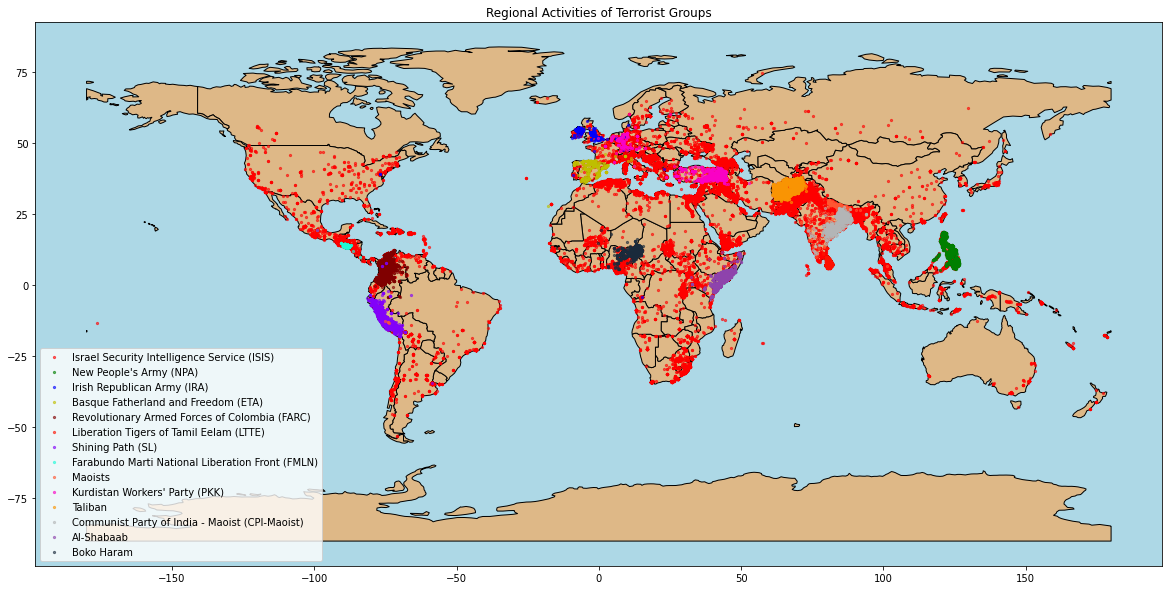

In [21]:
# its okay
import geopandas as gpd
from shapely.geometry import Point

# Ensure your df_terr DataFrame has 'longitude' and 'latitude' columns
df_terr['Coordinates'] = df_terr.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Create a GeoDataFrame
gdf_terr = gpd.GeoDataFrame(df_terr, geometry='Coordinates')

# Filter top 15 groups by number of attacks
top_groups = df_terr[df_terr['Group'].isin(df_terr['Group'].value_counts()[:15].index)]

# Create a GeoDataFrame for top groups
gdf_top_groups = gpd.GeoDataFrame(top_groups, geometry='Coordinates')

# Load the world map shapefile (replace 'path_to_shapefile' with your actual path)
world = gpd.read_file("ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shp")

# Plot the map
fig, ax = plt.subplots(figsize=(22, 10))
ax.patch.set_facecolor('lightblue')

world.plot(ax=ax, color='burlywood', edgecolor='black')

# Define colors and groups
colors = ['r', 'g', 'b', 'y', '#800000', '#ff1100', '#8202fa', '#20fad9', '#ff5733', '#fa02c6', "#f99504", '#b3b6b7', '#8e44ad', '#1a2b3c']
groups = list(gdf_top_groups['Group'].unique())

# Plot points for each group
for group, color in zip(groups, colors):
    group_data = gdf_top_groups[gdf_top_groups['Group'] == group]
    group_data.plot(ax=ax, marker='o', color=color, markersize=5, label=group, alpha=0.6)

# Add legend
legend = plt.legend(loc='lower left', frameon=True, prop={'size': 10})
frame = legend.get_frame()
frame.set_facecolor('white')

# Set plot title
plt.title('Regional Activities of Terrorist Groups')

# Show the plot
plt.show()
